In [1]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import psycopg2 # needed to get database exception errors when uploading dataframe
import requests # package for getting data from the web
from zipfile import * # package for unzipping zip files

In [2]:
# Import get_engine function from sql_functions.py and set it to a variable called engine
from sql_functions import get_engine 
engine = get_engine()
# Import psycopg2
import psycopg2

In [3]:
# Import the Information about the schema & table name
schema = 'capstone_wildfire' 
table_name = 'combined_weather_data_v4'

# Get fire_data as WF & weather_data as DF

In [4]:
# Get Data From SQL Database 

import pandas as pd
import sqlalchemy

# Verbindung zur Datenbank herstellen
engine = get_engine()

# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.combined_weather_data_v4"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
df = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(df)

             date  average_temp_c  minimum_temp_c  maximum_temp_c  \
0      2011-09-17             NaN             NaN             NaN   
1      2011-06-08            29.6            22.2            36.1   
2      2005-01-31             NaN             NaN             NaN   
3      2012-04-22             NaN             NaN             NaN   
4      2012-04-24             NaN             NaN             NaN   
...           ...             ...             ...             ...   
550409 2012-04-16             NaN             NaN             NaN   
550410 2011-06-06            30.9            23.9            35.6   
550411 2012-04-19             NaN             NaN             NaN   
550412 2011-09-12             NaN             NaN             NaN   
550413 2011-06-07            29.2            21.1            35.6   

        precipitation_mm  snow_mm  wind_direction_deg  windspeed_kmh  \
0                    NaN      NaN                 NaN            NaN   
1                    0.0   

In [5]:
# Get Data From SQL Database 

import pandas as pd
import sqlalchemy

# Verbindung zur Datenbank herstellen
engine = get_engine()

# SQL-Abfrage, um Daten aus der Tabelle zu laden
sql_query = "SELECT * FROM capstone_wildfire.fires_data_v1_rdy_to_clean_rows"

# Daten aus der Datenbank abrufen und in ein DataFrame laden
wf = pd.read_sql_query(sql_query, engine)

# DataFrame anzeigen
print(wf)

         unique_id source_reporting_unit_name gov_firecode  \
0          1370840          Tehama-Glenn Unit    undefined   
1          1370842          Tehama-Glenn Unit    undefined   
2          1370843          Tehama-Glenn Unit    undefined   
3          1370844          Tehama-Glenn Unit    undefined   
4          1370846          Tehama-Glenn Unit    undefined   
...            ...                        ...          ...   
1674433    1370833          Tehama-Glenn Unit    undefined   
1674434    1370834          Tehama-Glenn Unit    undefined   
1674435    1370835          Tehama-Glenn Unit    undefined   
1674436    1370836          Tehama-Glenn Unit    undefined   
1674437    1370839          Tehama-Glenn Unit    undefined   

                         fire_name  cause_code    cause_descr  fire_size  \
0        "BERREY,T"                          8       Children        1.5   
1        "WARREN,R"                          9  Miscellaneous        2.0   
2        REMUNDA           

To perform the statistical analysis on the given datasets using numpy, you can follow these steps:
Step 1: Import the required libraries
import numpy done


In [6]:
from scipy.stats import pearsonr, spearmanr, linregress, f_oneway



In [7]:
# Assuming 'date' column in df is not datetime, convert it to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Group 'df' data by 'date' and calculate the daily average temperature
df_avg_temp = df.groupby(df['date'].dt.date)['average_temp_c'].mean().reset_index()

In [9]:
# Preprocess data and filter for the specified time frame (1995-2015)
df = df[(df['date'].dt.year >= 1995) & (df['date'].dt.year <= 2015)]

In [10]:
# Select the 'average_temp_c' column from the weather dataset
df = df[['date', 'average_temp_c']]

In [11]:
# Create a new column 'day' by extracting the day from the date
wf['day'] = wf['combined_discovery_date'].dt.date


In [12]:
# Count the number of unique wildfires discovered on each day
wf_agg = wf.groupby('day')['unique_id'].nunique().reset_index()
wf_agg.columns = ['Day', 'Number of Wildfires']


In [13]:
# Merge daily average temperature and wildfire data on the 'Day' column
merged_data = pd.merge(df_avg_temp, wf_agg, left_on='date', right_on='Day')

#This code will give you one 'weather data point' per day with the daily average temperature 
#for all 71 weather stations and the corresponding number of wildfires discovered on each day. 
#This merged data can then be used for Pearson Correlation analysis.

- wetterstationen, 71 insgesamt, 71 wetterstionen  seperat berechnet (das ist das problem )

In [14]:
# Remove rows with missing values (NaN) in either column
merged_data = merged_data.dropna(subset=['average_temp_c', 'Number of Wildfires'])

VISUALISIERUNG THE RESULT:

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Assuming you have calculated the correlation coefficient and p-value
corr_coefficient = 0.297  
p_value = 1.216e-155  

Here's the code to create a grouped bar plot that displays both the correlation coefficient and the p-value:

VISUALIZATION OF THE # Calculate the Pearson correlation coefficient and p-value
#corr_coefficient, p_value = stats.pearsonr(merged_data['average_temp_c'], merged_data['Number of Wildfires'])

# diese berechnung als plot , scata plot


To visualize the Pearson correlation coefficient and p-value using a scatter plot in Python, you can create a scatter plot with the correlation coefficient on one axis and the negative logarithm (base 10) of the p-value on the other axis. This is a common approach to visualize correlation strength and statistical significance. Here's how you can do it.
In this code, we calculate the negative logarithm (base 10) of the p-value to visualize its significance more effectively. The scatter plot shows the relationship between the correlation coefficient and the significance of the correlation.

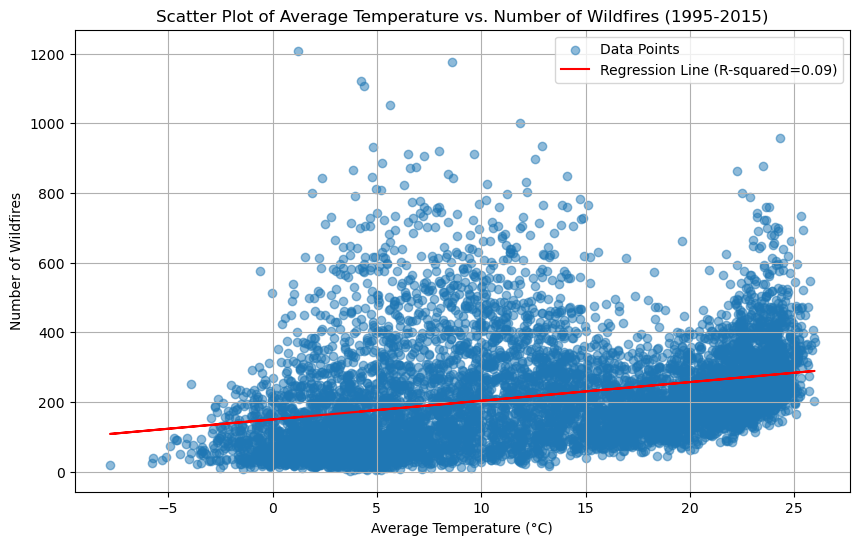

In [43]:
# Creating a Scatterplot
plt.figure(figsize=(10, 6))
x = merged_data['average_temp_c']
y = merged_data['Number of Wildfires']

# Creating the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, label='Data Points', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')
plt.legend()
plt.grid(True)
plt.show()

NEW DIAGRAM 2.10.23


In [44]:

# Create new DataFrame from merged_df
average_temp_c_rounded = merged_data[['date', 'average_temp_c', 'Number of Wildfires']] 

# Round temperatures to nearest integer
average_temp_c_rounded['average_temp_c_rounded'] = average_temp_c_rounded['average_temp_c'].round().astype(int)

# Groupby rounded temperature and sum fire counts
average_temp_c_rounded = average_temp_c_rounded.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c', 
    'Number of Wildfires': 'total_fires'
}, inplace=True)
average_temp_c_rounded

,temp_c,total_fires
0,-8,19
1,-6,63
2,-5,429
3,-4,668
4,-3,2878
5,-2,7174
6,-1,12315
7,0,17936
8,1,32387
9,2,41932


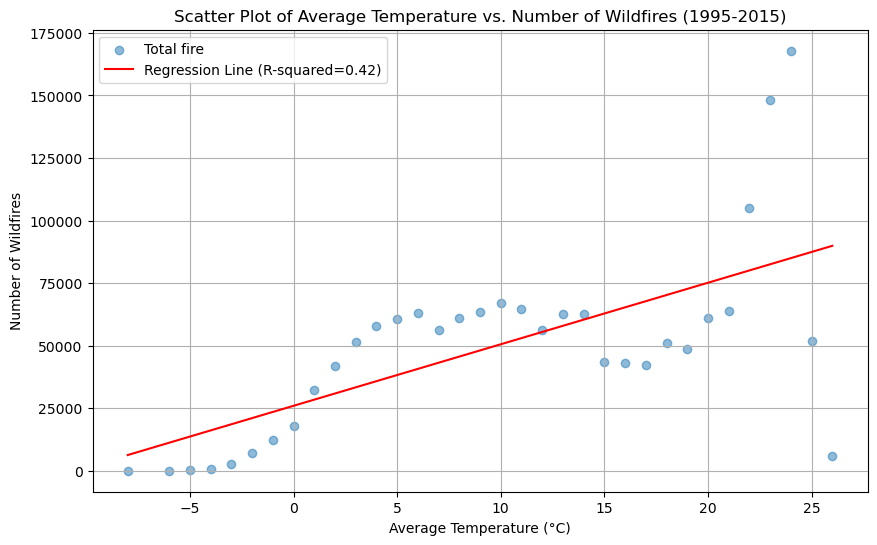

In [45]:


# Streudiagramm mit einer Regressionslinie erstellen
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Berechnung der Regressionslinie
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.scatter(x, y, label='Total fire', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')
plt.legend()
plt.grid(True)
plt.show()

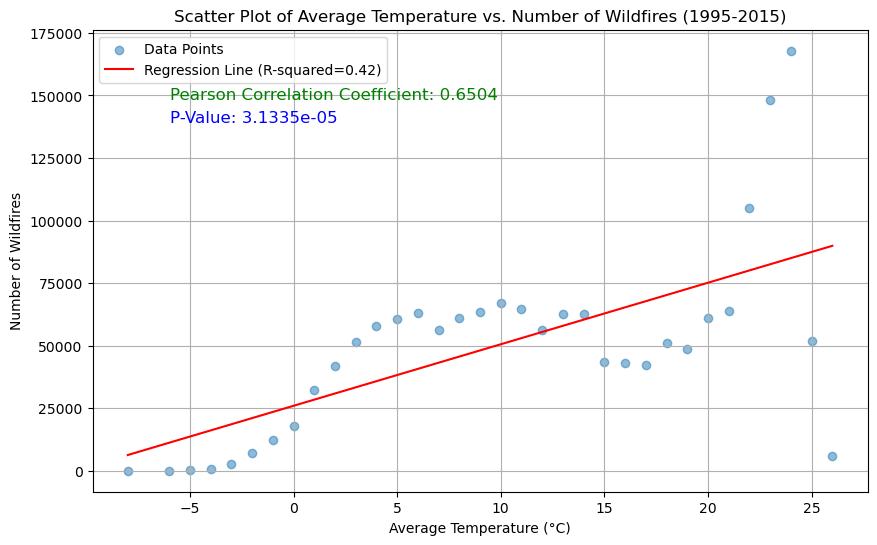

In [63]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Create new DataFrame from merged_df
average_temp_c_rounded = merged_data[['date', 'average_temp_c', 'Number of Wildfires']] 

# Round temperatures to nearest integer
average_temp_c_rounded['average_temp_c_rounded'] = average_temp_c_rounded['average_temp_c'].round().astype(int)

# Groupby rounded temperature and sum fire counts
average_temp_c_rounded = average_temp_c_rounded.groupby('average_temp_c_rounded')['Number of Wildfires'].sum().reset_index()

# Rename columns
average_temp_c_rounded.rename(columns={
    'average_temp_c_rounded': 'temp_c', 
    'Number of Wildfires': 'total_fires'
}, inplace=True)

# Streudiagramm mit einer Regressionslinie erstellen
plt.figure(figsize=(10, 6))
x = average_temp_c_rounded['temp_c']
y = average_temp_c_rounded['total_fires']

# Berechnung der Regressionslinie
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

# Calculate Pearson Correlation Coefficient and P-Value
pearson_corr_coeff = r_value
p_value = p_value

plt.scatter(x, y, label=f'Data Points', alpha=0.5)
plt.plot(x, line, color='red', label=f'Regression Line (R-squared={r_value**2:.2f})')
plt.title('Scatter Plot of Average Temperature vs. Number of Wildfires (1995-2015)')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Number of Wildfires')

# Annotate the Pearson Correlation Coefficient and P-Value
plt.annotate(f'Pearson Correlation Coefficient: {pearson_corr_coeff:.4f}', (0.1, 0.85), xycoords='axes fraction', fontsize=12, color='green')
plt.annotate(f'P-Value: {p_value:.4e}', (0.1, 0.80), xycoords='axes fraction', fontsize=12, color='blue')

plt.legend()
plt.grid(True)
plt.show()


Create a block bar plot where each block represents a range of 1°C. Here's the modified code.
This code will create a block bar plot where each block represents a range of 1°C, starting from -5°C to 25°C. The x-axis will display the temperature blocks, and the y-axis will show the number of wildfires for each block. Feel free to adjust the temperature range or other parameters as needed.







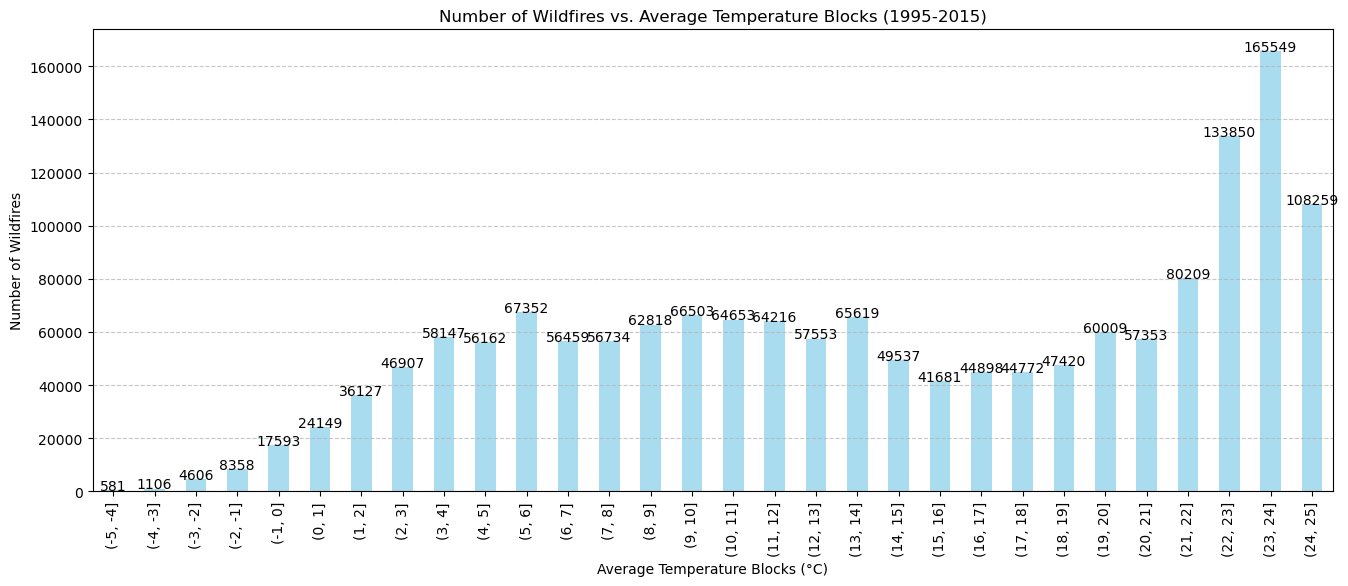

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Create temperature blocks
temperature_blocks = np.arange(-5, 26, 1)  # Create an array from -5 to 25 with a step of 1

# Categorize average temperatures into blocks
merged_data['Temp Block'] = pd.cut(merged_data['average_temp_c'], bins=temperature_blocks)

# Calculate the number of wildfires in each temperature block
block_counts = merged_data.groupby('Temp Block')['Number of Wildfires'].sum()

# Bar chart
plt.figure(figsize=(16, 6))
block_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Wildfires vs. Average Temperature Blocks (1995-2015)')
plt.xlabel('Average Temperature Blocks (°C)')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for x, y in enumerate(block_counts):
    plt.text(x, y + 10, str(y), ha='center')

plt.show()


NEW DIAGRAM 
To visualize the calculation with the specified temperature blocks and adjusted y-axis. 
Modified code:This code create a bar chart with three blocks for average temperature (-5 to 5°C, 5 to 15°C, and 15 to 25°C) on the x-axis and the number of wildfires on the y-axis. 
Each bar represents the total number of wildfires in the corresponding temperature block.

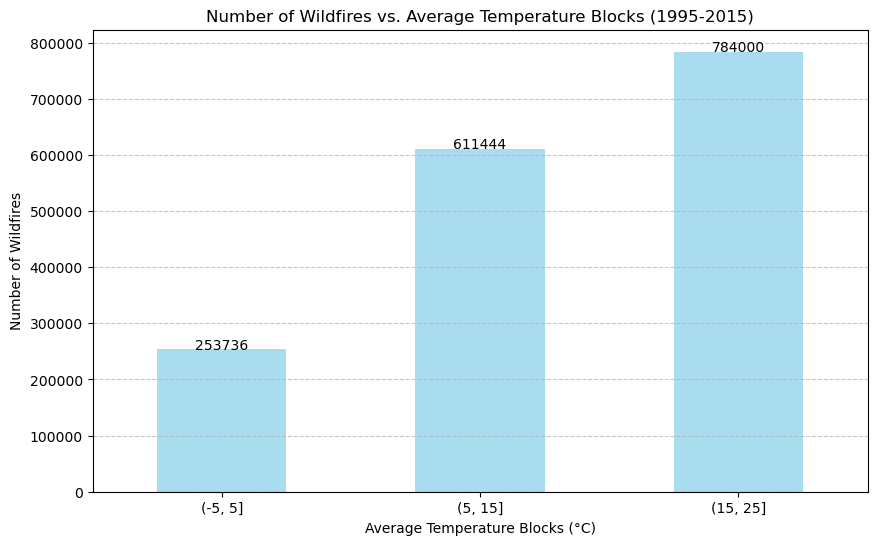

In [68]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Create temperature blocks
temperature_blocks = [-5, 5, 15, 25]

# Categorize average temperatures into blocks
merged_data['Temp Block'] = pd.cut(merged_data['average_temp_c'], bins=temperature_blocks)

# Calculate the number of wildfires in each temperature block
block_counts = merged_data.groupby('Temp Block')['Number of Wildfires'].sum()

# Bar chart
plt.figure(figsize=(10, 6))
block_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Wildfires vs. Average Temperature Blocks (1995-2015)')
plt.xlabel('Average Temperature Blocks (°C)')
plt.ylabel('Number of Wildfires')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars
for x, y in enumerate(block_counts):
    plt.text(x, y + 10, str(y), ha='center')

plt.show()
